In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [40]:
# Step 2: Load data
train_df = pd.read_csv('Titanic_train.csv')

In [41]:
print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

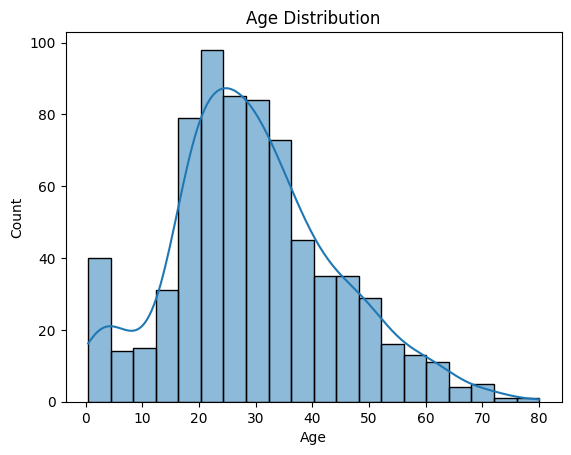

In [42]:
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

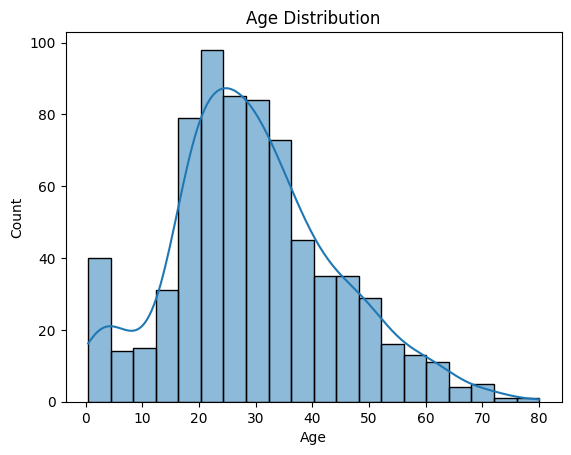

In [43]:
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

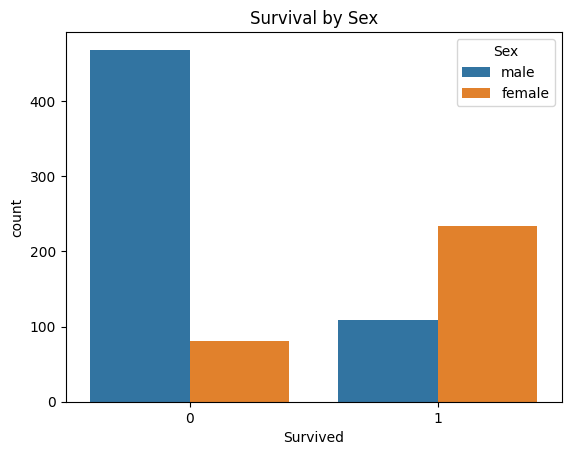

In [44]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title("Survival by Sex")
plt.show()

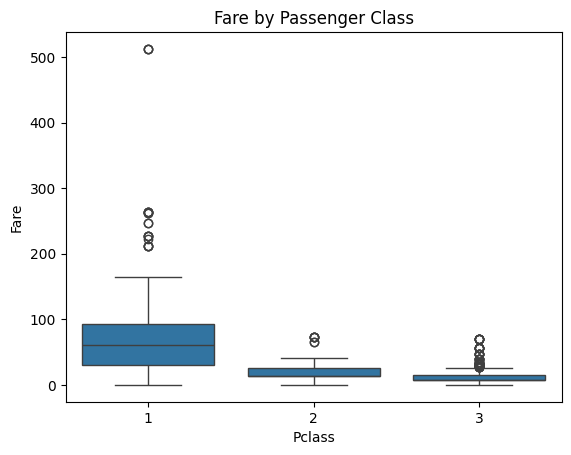

In [45]:
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title("Fare by Passenger Class")
plt.show()

In [46]:
# Step 4: Data Preprocessing
# Fill missing Age with median, Embarked with mode
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-46-1873724899.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-46-1873724899.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [47]:
# Drop Cabin and Name (too many missing or irrelevant)
train_df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [48]:
# Encode categorical variable
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])  # male=1, female=0
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

In [49]:
# Step 5: Train-Test Split
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Step 6: Model Building
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC Score: 0.8823680823680824


In [53]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



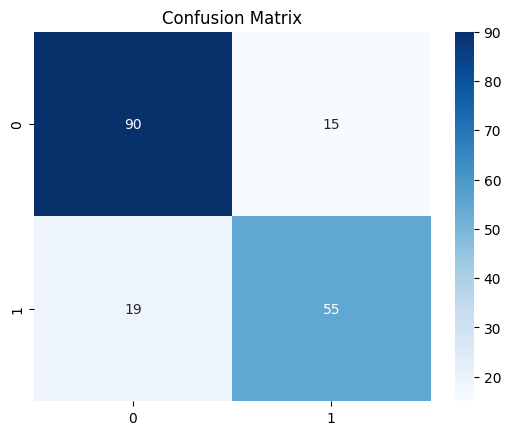

In [54]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

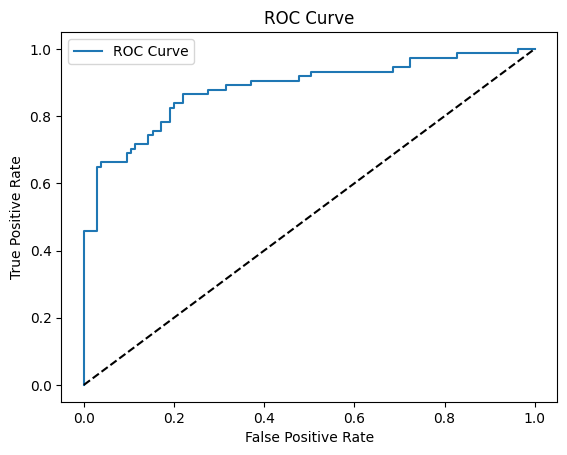

In [55]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [56]:
# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nLogistic Regression Coefficients:\n", coef_df)


Logistic Regression Coefficients:
     Feature  Coefficient
0    Pclass    -0.930680
1       Sex    -2.596994
2       Age    -0.030433
3     SibSp    -0.293905
4     Parch    -0.111853
5      Fare     0.002534
6  Embarked    -0.218777


In [57]:
import streamlit as st
import pickle
import numpy as np

In [58]:
# Load model
model = pickle.load(open('titanic_model.pkl', 'rb'))

In [59]:
st.title("Titanic Survival Predictor")

2025-07-12 16:53:34.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [60]:
Pclass = st.selectbox("Passenger Class (1=1st, 2=2nd, 3=3rd)", [1, 2, 3])
Sex = st.radio("Sex", ['male', 'female'])
Age = st.slider("Age", 0, 100, 25)
SibSp = st.number_input("Number of Siblings/Spouses", 0, 10, 0)
Parch = st.number_input("Number of Parents/Children", 0, 10, 0)
Fare = st.number_input("Fare Paid", 0.0, 600.0, 50.0)
Embarked = st.selectbox("Embarked Port", ['C', 'Q', 'S'])

2025-07-12 16:53:34.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:34.819 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [61]:
# Encode inputs
Sex = 1 if Sex == 'male' else 0
Embarked = {'C': 0, 'Q': 1, 'S': 2}[Embarked]

In [62]:
# Predict
if st.button("Predict"):
    input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])
    prediction = model.predict(input_data)
    st.success("Survived" if prediction[0] == 1 else "Did not survive")


2025-07-12 16:53:37.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:37.034 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:37.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:37.036 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:37.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 16:53:37.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [63]:
# Save the trained model
import pickle
pickle.dump(model, open('titanic_model.pkl', 'wb'))

In [22]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [25]:
import os

file_name = 'titanic_model.pkl'
if os.path.exists(file_name):
    print(f"The file '{file_name}' exists.")
else:
    print(f"The file '{file_name}' does not exist.")

print("\nFiles in the current directory:")
print(os.listdir('.'))

The file 'titanic_model.pkl' does not exist.

Files in the current directory:
['.config', 'Titanic_test.csv', 'Titanic_train.csv', 'sample_data']


In [35]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load model
try:
    model = pickle.load(open('titanic_model.pkl', 'rb'))
except FileNotFoundError:
    st.error("Error: 'titanic_model.pkl' not found. Please ensure the model file is in the same directory.")
    st.stop()

st.title("Titanic Survival Predictor")

# Input fields for user data
Pclass = st.selectbox("Passenger Class (1=1st, 2=2nd, 3=3rd)", [1, 2, 3])
Sex = st.radio("Sex", ['male', 'female'])
Age = st.slider("Age", 0, 100, 25)
SibSp = st.number_input("Number of Siblings/Spouses", 0, 10, 0)
Parch = st.number_input("Number of Parents/Children", 0, 10, 0)
Fare = st.number_input("Fare Paid", 0.0, 600.0, 50.0)
Embarked = st.selectbox("Embarked Port", ['C', 'Q', 'S'])

# Encode inputs
# Use the same LabelEncoder as used during training for consistency
# Need to re-initialize or load the LabelEncoders if they were not saved
# For simplicity, I'll re-create a basic encoding based on the training data's unique values and the previous encoding logic
sex_le = LabelEncoder()
sex_le.fit(['male', 'female']) # Fit with all possible values
Sex_encoded = sex_le.transform([Sex])[0]

embarked_le = LabelEncoder()
# Based on previous notebook execution, the unique values for Embarked were 'S', 'C', 'Q' and were encoded as 2, 0, 1 respectively.
# To ensure consistency, we'll manually map them here.
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
Embarked_encoded = embarked_mapping[Embarked]


# Predict
if st.button("Predict"):
    input_data = np.array([[Pclass, Sex_encoded, Age, SibSp, Parch, Fare, Embarked_encoded]])
    prediction = model.predict(input_data)

    if prediction[0] == 1:
        st.success("Survived")
    else:
        st.error("Did not survive")

Writing app.py
